In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
url = 'https://meu-trab-88.s3.amazonaws.com/dataset_2193_autoPrice.csv'

In [ ]:
from inspect import Attribute
Attribute = ["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","class"]
dataset = Past = pd.read_csv(url, encoding = 'cp1252')
colunas = ["horsepower", "peak-rpm","city-mpg","highway-mpg","class"]
dataset.columns = Attribute

In [ ]:
print(dataset)

     symboling  normalized-losses  wheel-base  length  width  height  \
0            2                164        99.8   176.6   66.2    54.3   
1            2                164        99.4   176.6   66.4    54.3   
2            1                158       105.8   192.7   71.4    55.7   
3            1                158       105.8   192.7   71.4    55.9   
4            2                192       101.2   176.8   64.8    54.3   
..         ...                ...         ...     ...    ...     ...   
154         -1                 95       109.1   188.8   68.9    55.5   
155         -1                 95       109.1   188.8   68.8    55.5   
156         -1                 95       109.1   188.8   68.9    55.5   
157         -1                 95       109.1   188.8   68.9    55.5   
158         -1                 95       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  \
0           2337          109  3.19    3.40              

In [ ]:
print(dataset.shape)

(159, 16)


In [ ]:
print(dataset.head())

   symboling  normalized-losses  wheel-base  length  width  height  \
0          2                164        99.8   176.6   66.2    54.3   
1          2                164        99.4   176.6   66.4    54.3   
2          1                158       105.8   192.7   71.4    55.7   
3          1                158       105.8   192.7   71.4    55.9   
4          2                192       101.2   176.8   64.8    54.3   

   curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  \
0         2337          109  3.19     3.4               10.0         102   
1         2824          136  3.19     3.4                8.0         115   
2         2844          136  3.19     3.4                8.5         110   
3         3086          131  3.13     3.4                8.3         140   
4         2395          108  3.50     2.8                8.8         101   

   peak-rpm  city-mpg  highway-mpg  class  
0      5500        24           30  13950  
1      5500        18           22

In [ ]:
print(dataset.tail())

     symboling  normalized-losses  wheel-base  length  width  height  \
154         -1                 95       109.1   188.8   68.9    55.5   
155         -1                 95       109.1   188.8   68.8    55.5   
156         -1                 95       109.1   188.8   68.9    55.5   
157         -1                 95       109.1   188.8   68.9    55.5   
158         -1                 95       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  \
154         2952          141  3.78    3.15                9.5         114   
155         3049          141  3.78    3.15                8.7         160   
156         3012          173  3.58    2.87                8.8         134   
157         3217          145  3.01    3.40               23.0         106   
158         3062          141  3.78    3.15                9.5         114   

     peak-rpm  city-mpg  highway-mpg  class  
154      5400        23           28  16845  
155   

In [ ]:
print(dataset.describe())

        symboling  normalized-losses  wheel-base      length       width  \
count  159.000000         159.000000  159.000000  159.000000  159.000000   
mean     0.735849         121.132075   98.264151  172.413836   65.607547   
std      1.193086          35.651285    5.167416   11.523177    1.947883   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.650000   64.000000   
50%      1.000000         113.000000   96.900000  172.400000   65.400000   
75%      2.000000         148.000000  100.800000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  159.000000   159.000000   159.000000  159.000000  159.000000   
mean    53.899371  2461.138365   119.226415    3.300126    3.236352   
std      2.268761   481.941321    30.460791    0.267336    0.294888   
min     49.400000  1488.000000 

In [ ]:
print(dataset.groupby("class").size())

class
5118     1
5151     1
5195     1
5348     1
5389     1
        ..
28176    1
28248    1
31600    1
32250    1
35056    1
Length: 145, dtype: int64


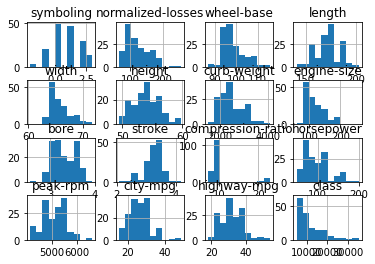

In [ ]:
dataset.hist()
plt.show()

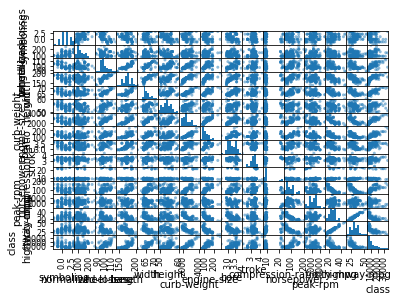

In [ ]:
scatter_matrix(dataset)
plt.show()

In [ ]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
array = dataset.values
array = dataset[colunas].values
X = array[:,0:5]
Y = array[:,3]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, 
                                 random_state=seed)

In [ ]:
print(type(array))

<class 'numpy.ndarray'>


In [ ]:
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', 
      multi_class='ovr'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
result = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  result.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.378205 (0.192179)
LDA: 0.432692 (0.125590)
KNN: 0.245513 (0.080476)
CART: 0.897436 (0.069928)
SVM: 0.071795 (0.065861)
